In [2]:
import pandas as pd
import functools
import matplotlib.pyplot as plt

# Loading the Data/First Looks

In [3]:
cols = ['book_authors', 'book_rating','book_rating_count', 'book_review_count', 'book_title', 'genres']
books = pd.read_csv('book_data.csv', usecols = cols).dropna()

In [4]:
books.head()

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres
0,Suzanne Collins,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...
1,J.K. Rowling|Mary GrandPré,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction
2,Harper Lee,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance
4,Stephenie Meyer,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...


In [5]:
print(books.shape)

(51059, 6)


In [6]:
print(books.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51059 entries, 0 to 54300
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_authors       51059 non-null  object 
 1   book_rating        51059 non-null  float64
 2   book_rating_count  51059 non-null  int64  
 3   book_review_count  51059 non-null  int64  
 4   book_title         51059 non-null  object 
 5   genres             51059 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ MB
None


In [7]:
books.describe()

,book_rating,book_rating_count,book_review_count
count,51059.000000,5.105900e+04,51059.000000
mean,4.006074,4.625927e+04,2138.538534
std,0.298442,2.190145e+05,7848.260391
min,0.000000,0.000000e+00,0.000000
25%,3.820000,6.310000e+02,50.000000
50%,4.020000,3.345000e+03,223.000000
75%,4.200000,1.428800e+04,911.000000
max,5.000000,5.588580e+06,160776.000000


In [8]:
genres = books['genres']

In [16]:
books['genreDicts'] = genres.apply(pipesToDict)

In [17]:
books['genres'] = genres.apply(lambda x: str(x).split('|'))

In [18]:
genresDicts= list(books['genreDicts'].values)

In [19]:
genrecount = functools.reduce(genreCounts, genresDicts)

In [20]:
{k: v for k, v in sorted(genrecount.items(), key=lambda item: item[1])[-30:]}

{'Sequential Art': 1726,
 'Autobiography': 1763,
 'Religion': 1817,
 'Short Stories': 1847,
 'Philosophy': 1940,
 'Crime': 2080,
 'Contemporary Romance': 2115,
 'Humor': 2151,
 'Adventure': 2267,
 'Horror': 2316,
 'Biography': 2370,
 'Novels': 2553,
 'History': 2683,
 'European Literature': 2954,
 'Thriller': 3045,
 'Literature': 3792,
 'Childrens': 3966,
 'Cultural': 4972,
 'Science Fiction': 5137,
 'Paranormal': 5176,
 'Mystery': 5681,
 'Contemporary': 6064,
 'Classics': 6316,
 'Historical Fiction': 6408,
 'Historical': 7120,
 'Nonfiction': 7727,
 'Young Adult': 10533,
 'Romance': 12899,
 'Fantasy': 14295,
 'Fiction': 26007}

In [23]:
#print(genresList)

In [24]:
def pipesToDict(words):
    wordList = str(words).split('|')
    d = {}
    for word in wordList:
        if word in d:
            d[word] += 1
        else:
            d[word] = 1
    return d

In [25]:
def genreCounts(d1, d2):
    result = d1.copy()
    for word in d2.keys():
        if word in result:
            result[word] += 1
        else:
            result[word] = 1
    return result

In [26]:
topGenres = [ k for k, v in sorted(genrecount.items(), key=lambda item: item[1])[-30:]]

In [27]:
books.head(5)

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts
0,Suzanne Collins,4.33,5519135,160706,The Hunger Games,"[Young Adult, Fiction, Science Fiction, Dystop...","{'Young Adult': 1, 'Fiction': 1, 'Science Fict..."
1,J.K. Rowling|Mary GrandPré,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction]","{'Fantasy': 1, 'Young Adult': 1, 'Fiction': 1}"
2,Harper Lee,4.27,3745197,79450,To Kill a Mockingbird,"[Classics, Fiction, Historical, Historical Fic...","{'Classics': 1, 'Fiction': 1, 'Historical': 1,..."
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,4.25,2453620,54322,Pride and Prejudice,"[Classics, Fiction, Romance]","{'Classics': 1, 'Fiction': 1, 'Romance': 1}"
4,Stephenie Meyer,3.58,4281268,97991,Twilight,"[Young Adult, Fantasy, Romance, Paranormal, Va...","{'Young Adult': 1, 'Fantasy': 2, 'Romance': 1,..."


In [28]:
for genre in topGenres:
    books[genre] = books['genres'].apply(lambda x: 1 if genre in x else 0)

In [29]:
books.head(5)

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts,Sequential Art,Autobiography,Religion,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
0,Suzanne Collins,4.33,5519135,160706,The Hunger Games,"[Young Adult, Fiction, Science Fiction, Dystop...","{'Young Adult': 1, 'Fiction': 1, 'Science Fict...",0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,J.K. Rowling|Mary GrandPré,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction]","{'Fantasy': 1, 'Young Adult': 1, 'Fiction': 1}",0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,Harper Lee,4.27,3745197,79450,To Kill a Mockingbird,"[Classics, Fiction, Historical, Historical Fic...","{'Classics': 1, 'Fiction': 1, 'Historical': 1,...",0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,4.25,2453620,54322,Pride and Prejudice,"[Classics, Fiction, Romance]","{'Classics': 1, 'Fiction': 1, 'Romance': 1}",0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,Stephenie Meyer,3.58,4281268,97991,Twilight,"[Young Adult, Fantasy, Romance, Paranormal, Va...","{'Young Adult': 1, 'Fantasy': 2, 'Romance': 1,...",0,0,0,...,0,0,0,0,0,0,1,1,1,1


(array([15.,  2.,  7.,  2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 1726.        ,  3344.73333333,  4963.46666667,  6582.2       ,
         8200.93333333,  9819.66666667, 11438.4       , 13057.13333333,
        14675.86666667, 16294.6       , 17913.33333333, 19532.06666667,
        21150.8       , 22769.53333333, 24388.26666667, 26007.        ]),
 <a list of 15 Patch objects>)

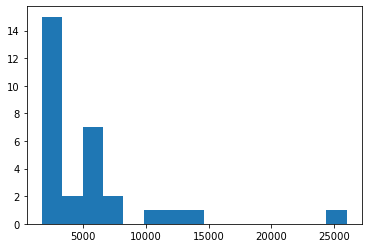

In [30]:
keys = topGenres
values = [genrecount[genre] for genre in keys]

plt.hist(values, bins = 15)

In [31]:
genreAverages = []
for genre in topGenres:
    genreAverages.append(books.groupby(genre).mean()['book_rating'].values[1])
print(genreAverages)

[4.176315179606029, 4.008706749858199, 4.15644468904788, 3.996756903086102, 4.052489690721652, 3.952533653846155, 4.039895981087473, 3.980181311018132, 4.0406484340538045, 3.930988773747837, 4.034464135021088, 3.8982530356443483, 4.0719008572493465, 3.932610020311438, 3.918755336617404, 3.9479720464134944, 4.050015128593043, 3.9598551890587372, 3.9783158099688447, 4.003276661514693, 3.932112304171784, 3.9317183377308793, 4.008909119696, 3.983893570536835, 3.983907303370789, 4.059059143263883, 3.9793866894521974, 4.001862935111241, 4.035298356068542, 3.956342523166868]


In [32]:
genreReviewCounts = []
for genre in topGenres:
    genreReviewCounts.append(books.groupby(genre).sum()['book_review_count'].values[1])
print(genreReviewCounts)

[816995, 3202902, 984393, 1454308, 2717314, 6164398, 2493168, 3341501, 4782840, 4705954, 3389170, 6809901, 2135520, 1881163, 8214137, 11059849, 5736266, 6184493, 22409911, 9331299, 12848498, 20013743, 25155400, 19200386, 19582885, 6999213, 42714146, 31171396, 41406345, 83101870]


In [33]:
genreBookCounts = []
for genre in topGenres:
    genreBookCounts.append(books.groupby(genre).count()['book_title'].values[1])
print(genreBookCounts)

[1726, 1763, 1817, 1847, 1940, 2080, 2115, 2151, 2267, 2316, 2370, 2553, 2683, 2954, 3045, 3792, 3966, 4972, 5136, 5176, 5681, 6064, 6316, 6408, 7120, 7727, 10533, 12899, 14295, 26007]


In [34]:
genreAuthorCounts = []
for genre in topGenres:
    genreAuthorCounts.append(books.groupby(genre)['book_authors'].nunique().values[1])
print(genreBookCounts)

[1726, 1763, 1817, 1847, 1940, 2080, 2115, 2151, 2267, 2316, 2370, 2553, 2683, 2954, 3045, 3792, 3966, 4972, 5136, 5176, 5681, 6064, 6316, 6408, 7120, 7727, 10533, 12899, 14295, 26007]


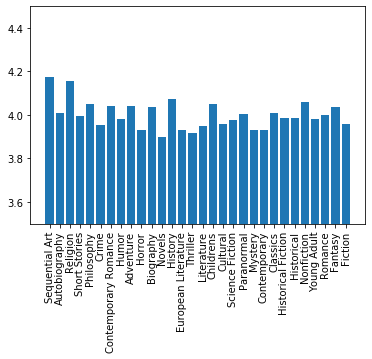

In [35]:
plt.bar(x = topGenres, height= genreAverages)
plt.ylim(3.5, 4.5)
plt.xticks(rotation = 90)
#plt.savefig('ratings.png')
pass

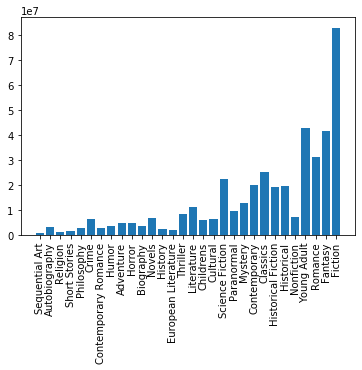

In [36]:
plt.bar(x = topGenres, height= genreReviewCounts)
plt.xticks(rotation = 90)
#plt.savefig('numRatings.png')
pass

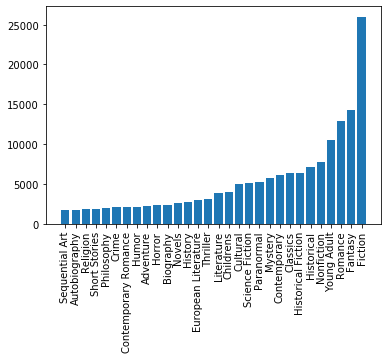

In [37]:
plt.bar(x = topGenres, height= genreBookCounts)
plt.xticks(rotation = 90)
pass

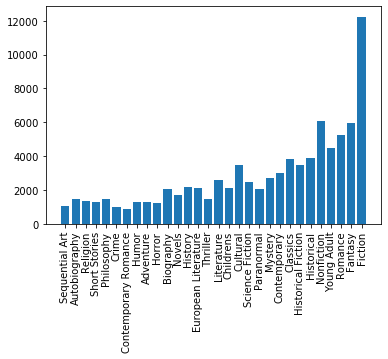

In [38]:
plt.bar(x = topGenres, height= genreAuthorCounts)
plt.xticks(rotation = 90)
pass

Interesting numbers:

num reviews vs num books

num authors per num books


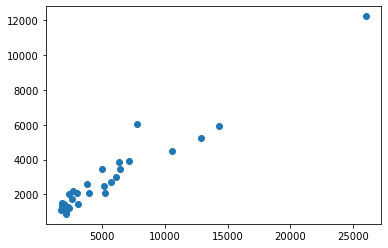

In [39]:
plt.scatter(x = genreBookCounts, y = genreAuthorCounts)

In [40]:
ReviewPerBooksRatio = []
for i in range(len(genreReviewCounts)):
    ReviewPerBooksRatio.append(genreReviewCounts[i]/genreBookCounts[i])

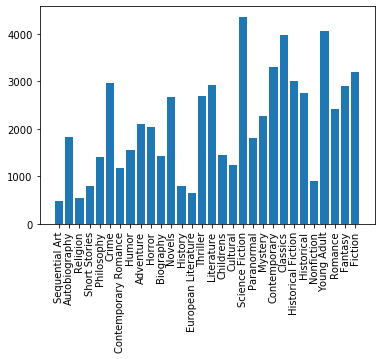

In [41]:
plt.bar(x = topGenres, height = ReviewPerBooksRatio)
plt.xticks(rotation = 90)
pass

# Young Adult Fantasy vs Non Young Adult Fantasy

In [42]:
FantasyBooks = books[books['Fantasy'] == 1]

In [43]:
FantasyBooks.head()

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts,Sequential Art,Autobiography,Religion,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
0,Suzanne Collins,4.33,5519135,160706,The Hunger Games,"[Young Adult, Fiction, Science Fiction, Dystop...","{'Young Adult': 1, 'Fiction': 1, 'Science Fict...",0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,J.K. Rowling|Mary GrandPré,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction]","{'Fantasy': 1, 'Young Adult': 1, 'Fiction': 1}",0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,Stephenie Meyer,3.58,4281268,97991,Twilight,"[Young Adult, Fantasy, Romance, Paranormal, Va...","{'Young Adult': 1, 'Fantasy': 2, 'Romance': 1,...",0,0,0,...,0,0,0,0,0,0,1,1,1,1
6,C.S. Lewis|Pauline Baynes,4.25,437829,9439,The Chronicles of Narnia,"[Fantasy, Classics, Fiction, Young Adult, Chil...","{'Fantasy': 1, 'Classics': 1, 'Fiction': 1, 'Y...",0,0,0,...,0,0,1,0,0,0,1,0,1,1
7,George Orwell,3.90,2235084,42156,Animal Farm,"[Classics, Fiction, Science Fiction, Dystopia,...","{'Classics': 1, 'Fiction': 1, 'Science Fiction...",0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [44]:
FantasyYA = FantasyBooks[FantasyBooks['Young Adult'] == 1]
FantasyNYA = FantasyBooks[FantasyBooks['Young Adult'] == 0]

In [45]:
FantasyYA.head()

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts,Sequential Art,Autobiography,Religion,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
0,Suzanne Collins,4.33,5519135,160706,The Hunger Games,"[Young Adult, Fiction, Science Fiction, Dystop...","{'Young Adult': 1, 'Fiction': 1, 'Science Fict...",0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,J.K. Rowling|Mary GrandPré,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction]","{'Fantasy': 1, 'Young Adult': 1, 'Fiction': 1}",0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,Stephenie Meyer,3.58,4281268,97991,Twilight,"[Young Adult, Fantasy, Romance, Paranormal, Va...","{'Young Adult': 1, 'Fantasy': 2, 'Romance': 1,...",0,0,0,...,0,0,0,0,0,0,1,1,1,1
6,C.S. Lewis|Pauline Baynes,4.25,437829,9439,The Chronicles of Narnia,"[Fantasy, Classics, Fiction, Young Adult, Chil...","{'Fantasy': 1, 'Classics': 1, 'Fiction': 1, 'Y...",0,0,0,...,0,0,1,0,0,0,1,0,1,1
19,Veronica Roth,4.22,2493519,104329,Divergent,"[Young Adult, Science Fiction, Dystopia, Ficti...","{'Young Adult': 1, 'Science Fiction': 1, 'Dyst...",0,0,0,...,0,0,0,0,0,0,1,0,1,1


In [46]:
FantasyNYA.head()

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts,Sequential Art,Autobiography,Religion,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
7,George Orwell,3.90,2235084,42156,Animal Farm,"[Classics, Fiction, Science Fiction, Dystopia,...","{'Classics': 1, 'Fiction': 1, 'Science Fiction...",0,0,0,...,0,0,1,0,0,0,0,0,1,1
9,J.R.R. Tolkien,4.59,99793,1652,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,"[Fantasy, Fiction, Classics]","{'Fantasy': 1, 'Fiction': 1, 'Classics': 1}",0,0,0,...,0,0,1,0,0,0,0,0,1,1
11,Douglas Adams,4.21,1155911,23919,The Hitchhiker's Guide to the Galaxy,"[Science Fiction, Fiction, Humor, Fantasy, Cla...","{'Science Fiction': 1, 'Fiction': 1, 'Humor': ...",0,0,0,...,0,0,1,0,0,0,0,0,1,1
16,Lewis Carroll|John Tenniel|Martin Gardner,4.07,411153,9166,Alice's Adventures in Wonderland & Through the...,"[Classics, Fantasy, Fiction, Childrens]","{'Classics': 1, 'Fantasy': 1, 'Fiction': 1, 'C...",0,0,0,...,0,0,1,0,0,0,0,0,1,1
17,Oscar Wilde|Jeffrey Eugenides,4.06,775701,22938,The Picture of Dorian Gray,"[Fiction, Classics, Horror, Fantasy, Literatur...","{'Fiction': 1, 'Classics': 2, 'Horror': 1, 'Fa...",0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [47]:
print(FantasyYA['book_rating'].mean())
print(FantasyNYA['book_rating'].mean())

4.019269016050244
4.046028261123438


Cross section of genres

In [48]:
genresbooks.corr()

,book_rating,book_rating_count,book_review_count,Sequential Art,Autobiography,Religion,Short Stories,Philosophy,Crime,Contemporary Romance,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
book_rating,1.000000,0.058648,0.070518,0.106699,0.001669,0.096787,-0.006048,0.030909,-0.036970,0.023559,...,-0.087688,-0.091465,0.003570,-0.028155,-0.029899,0.074973,-0.045588,-0.008203,0.061063,-0.169784
book_rating_count,0.058648,1.000000,0.845330,-0.029328,-0.009700,-0.030443,-0.026538,-0.008906,0.007501,-0.027807,...,-0.009852,-0.000537,0.172799,0.032972,0.024856,-0.055123,0.085515,-0.005577,0.055452,0.135388
book_review_count,0.070518,0.845330,1.000000,-0.039687,-0.007754,-0.039083,-0.033353,-0.018685,0.021666,-0.025421,...,0.005551,0.054349,0.088290,0.041405,0.031384,-0.066328,0.124509,0.020597,0.060227,0.137201
Sequential Art,0.106699,-0.029328,-0.039687,1.000000,-0.016380,-0.034175,-0.028692,-0.032071,-0.031419,-0.038883,...,-0.041714,-0.065652,-0.061060,-0.054831,-0.059653,-0.052073,-0.033761,-0.047645,0.057390,-0.039051
Autobiography,0.001669,-0.009700,-0.007754,-0.016380,1.000000,0.010574,-0.017105,-0.010091,-0.014011,-0.039312,...,-0.057703,-0.066441,-0.030978,-0.071642,-0.069004,0.434666,-0.094556,-0.108222,-0.117446,-0.192683
Religion,0.096787,-0.030443,-0.039083,-0.034175,0.010574,1.000000,-0.028155,0.212873,-0.033703,-0.039401,...,-0.058218,-0.060062,-0.002493,-0.034157,-0.030327,0.248985,-0.089831,-0.106329,-0.090820,-0.129527
Short Stories,-0.006048,-0.026538,-0.033353,-0.028692,-0.017105,-0.028155,1.000000,-0.006681,-0.005965,-0.036587,...,-0.022850,-0.035132,0.142573,-0.051228,-0.054368,-0.056345,-0.051070,-0.086806,0.002779,0.102647
Philosophy,0.030909,-0.008906,-0.018685,-0.032071,-0.010091,0.212873,-0.006681,1.000000,-0.040436,-0.041313,...,-0.066409,-0.066308,0.112953,-0.069103,-0.070241,0.308263,-0.094482,-0.111301,-0.094035,-0.118267
Crime,-0.036970,0.007501,0.021666,-0.031419,-0.014011,-0.033703,-0.005965,-0.040436,1.000000,-0.040849,...,0.565722,-0.056053,-0.010922,-0.030517,-0.034334,-0.029519,-0.094531,-0.094275,-0.120116,0.121794
Contemporary Romance,0.023559,-0.027807,-0.025421,-0.038883,-0.039312,-0.039401,-0.036587,-0.041313,-0.040849,1.000000,...,-0.046985,0.443206,-0.078102,-0.077860,-0.081694,-0.087782,-0.070515,0.357320,-0.120430,-0.149870
